## Convolutional neural networks

Distinguish image content using convolutional neural network and plot the relationship between the accuracy/loss score and the number of epochs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.layers.normalization import batch_normalization

In [27]:
from keras.datasets import cifar10
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [113]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [29]:
def get_three_classes(x, y):
    samoloty, _ = np.where(y == 0) #samoloty
    samochody, _ = np.where(y == 1) #samochody
    ptaki, _ = np.where(y == 2) #ptaki

    idx = np.concatenate([samoloty, samochody, ptaki], axis = 0)
    
    x = x[idx]
    y = y[idx]
    
    count = x.shape[0]
    idx = np.random.choice(range(count), count, replace = False)
    
    x = x[idx]
    y = y[idx]
    
    return x, y

In [30]:
X_train, y_train = get_three_classes(X_train, Y_train)
X_test, y_test = get_three_classes(X_test, Y_test)

In [60]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [61]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

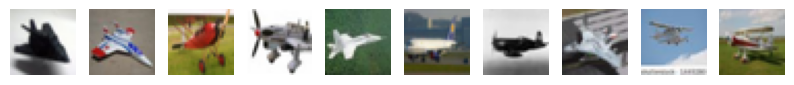

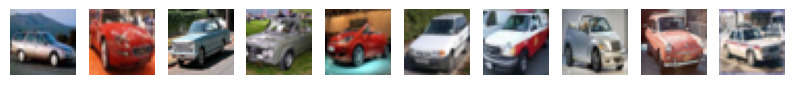

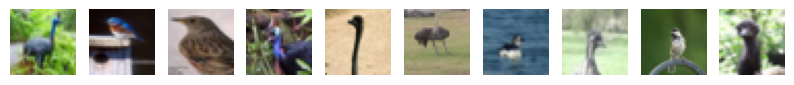

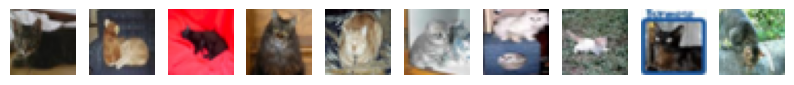

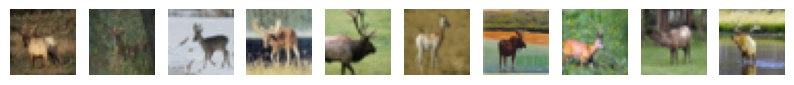

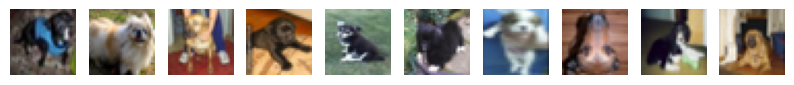

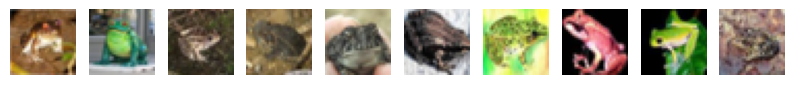

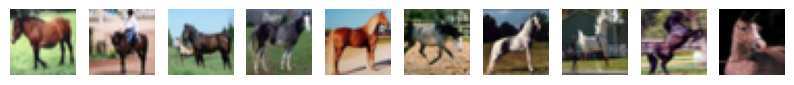

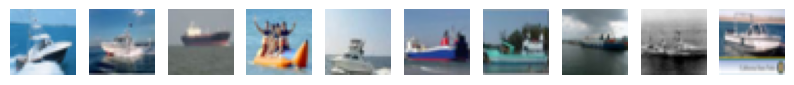

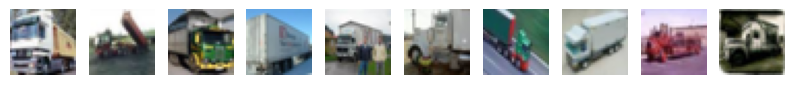

In [59]:
for j in range(10):
    plt.figure(figsize = (10,10))
    for i in range(0,10):
        plt.subplot(1,10,i+1)
        plt.imshow(X_train[np.where(y_train == j)[0][i]])
        plt.axis('off')
    plt.show()

Epoch 1/30
391/391 [==============================] - 128s 324ms/step - loss: 1.4912 - accuracy: 0.4677 - val_loss: 1.5311 - val_accuracy: 0.4776
Epoch 2/30
391/391 [==============================] - 127s 325ms/step - loss: 1.0670 - accuracy: 0.6255 - val_loss: 1.5351 - val_accuracy: 0.5133
Epoch 3/30
391/391 [==============================] - 130s 333ms/step - loss: 0.9250 - accuracy: 0.6741 - val_loss: 1.1508 - val_accuracy: 0.5964
Epoch 4/30
391/391 [==============================] - 131s 335ms/step - loss: 0.8346 - accuracy: 0.7091 - val_loss: 0.9086 - val_accuracy: 0.6874
Epoch 5/30
391/391 [==============================] - 132s 338ms/step - loss: 0.7651 - accuracy: 0.7322 - val_loss: 0.8482 - val_accuracy: 0.7022
Epoch 6/30
391/391 [==============================] - 131s 335ms/step - loss: 0.7044 - accuracy: 0.7538 - val_loss: 0.8088 - val_accuracy: 0.7190
Epoch 7/30
391/391 [==============================] - 132s 338ms/step - loss: 0.6674 - accuracy: 0.7670 - val_loss: 0.7358 -

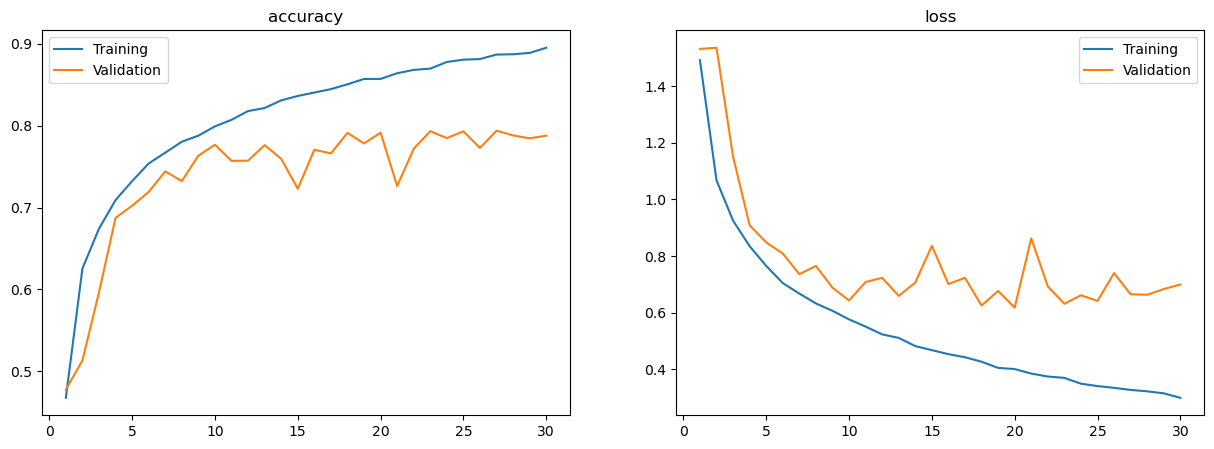

In [189]:
model = Sequential()

model.add(Input(shape = (32,32,3)))
model.add(Conv2D(filters = 32,
                kernel_size = (3,3),
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 256,
                kernel_size = (3,3),
                activation = 'relu'))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(batch_normalization.BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(filters = 256,
                kernel_size = (3,3),
                activation = 'relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 256,
                kernel_size = (3,3),
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(optimizer = Adam(learning_rate=0.0012), loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(
    X_train, y_train, 
    batch_size = 128, validation_data = (X_test, y_test), 
    epochs = 30, verbose  =1
)

model.evaluate(X_test, y_test)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('accuracy')
plt.plot(range(1, len( history.history['loss'])+1), history.history['accuracy'], label = 'Training')
plt.plot(range(1, len( history.history['loss'])+1), history.history['val_accuracy'], label = 'Validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('loss')
plt.plot(range(1, len( history.history['loss'])+1), history.history['loss'], label = 'Training')
plt.plot(range(1, len( history.history['loss'])+1), history.history['val_loss'], label = 'Validation')
plt.legend()

plt.show()